In [2]:
# 4_model_trainer.ipynb

from prophet import Prophet
import pandas as pd
import matplotlib.pyplot as plt

Importing plotly failed. Interactive plots will not work.


In [3]:

# Load transformed dataset
df = pd.read_csv("transformed_supply_chain.csv")
df['date'] = pd.to_datetime(df['date'])

In [4]:

# Focus on one SKU (for Prophet model)
sku_id = "SKU_001"
sku_df = df[df['SKU'] == sku_id][['date', 'Number of products sold']].rename(columns={"date": "ds", "Number of products sold": "y"})

In [5]:

# Fit Prophet model
model = Prophet()
model.fit(sku_df)

11:56:23 - cmdstanpy - INFO - Chain [1] start processing
11:56:24 - cmdstanpy - INFO - Chain [1] done processing


In [6]:

# Create future dataframe
future = model.make_future_dataframe(periods=12, freq='W')  # Forecast 12 weeks
forecast = model.predict(future)

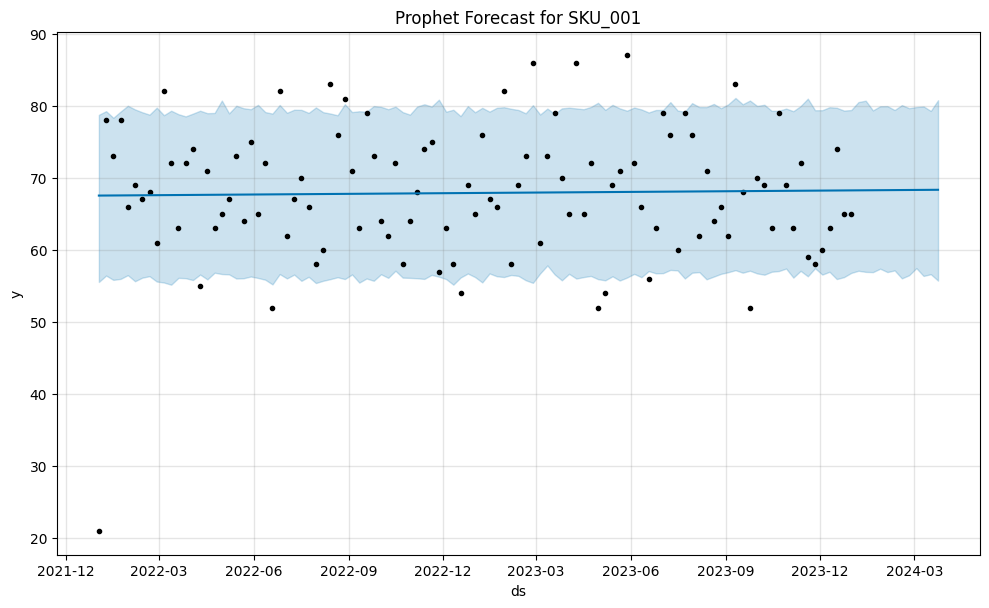

In [7]:

# Plot forecast
model.plot(forecast)
plt.title(f"Prophet Forecast for {sku_id}")
plt.show()

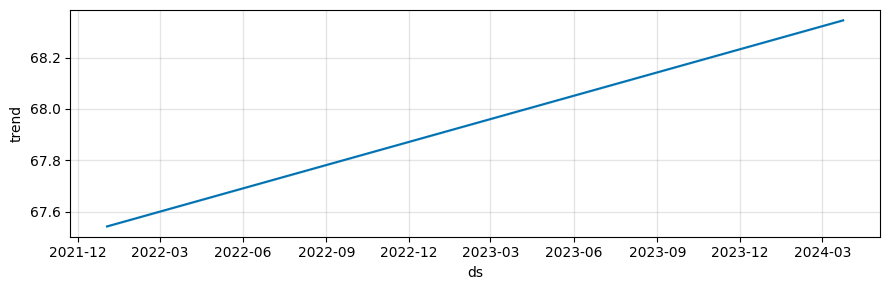

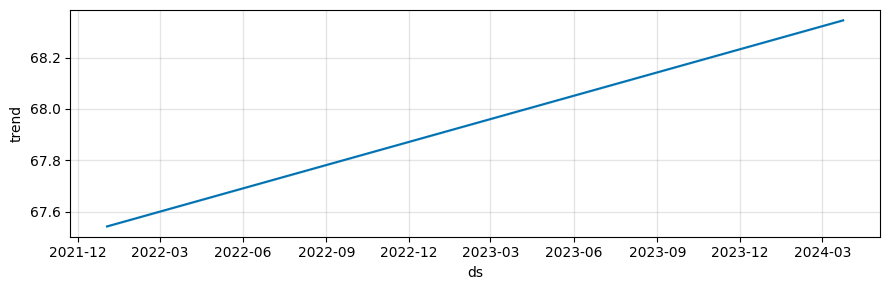

In [8]:

# Optional: plot components (trend, seasonality)
model.plot_components(forecast)


In [3]:
df = pd.read_csv("supply_chain_dataset.csv")  # Update if the path is different
df.columns



Index(['date', 'Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [5]:
# Rename columns for Prophet
df['ds'] = pd.to_datetime(df['date'])  # 🔁 Replace 'Date' if your date column has a different name
df['y'] = df['Number of products sold']  # 🔁 Replace if your sales column is different

# Keep only Prophet-required columns
df = df[['ds', 'y']]
df.head()


,ds,y
0,2022-01-01,12
1,2022-01-01,8
2,2022-01-01,9
3,2022-01-01,5
4,2022-01-01,14


In [6]:
df.columns


Index(['ds', 'y'], dtype='object')

In [7]:
from prophet import Prophet

model = Prophet()
model.fit(df)

future = model.make_future_dataframe(periods=30)  # forecast next 30 days
forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


14:05:24 - cmdstanpy - INFO - Chain [1] start processing
14:05:25 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
755,2024-01-26,9.874435,5.662194,14.016277
756,2024-01-27,10.110819,5.912559,14.368691
757,2024-01-28,9.958353,5.808938,13.849100
758,2024-01-29,10.121338,6.087507,14.143898
759,2024-01-30,10.053951,5.993241,13.929746


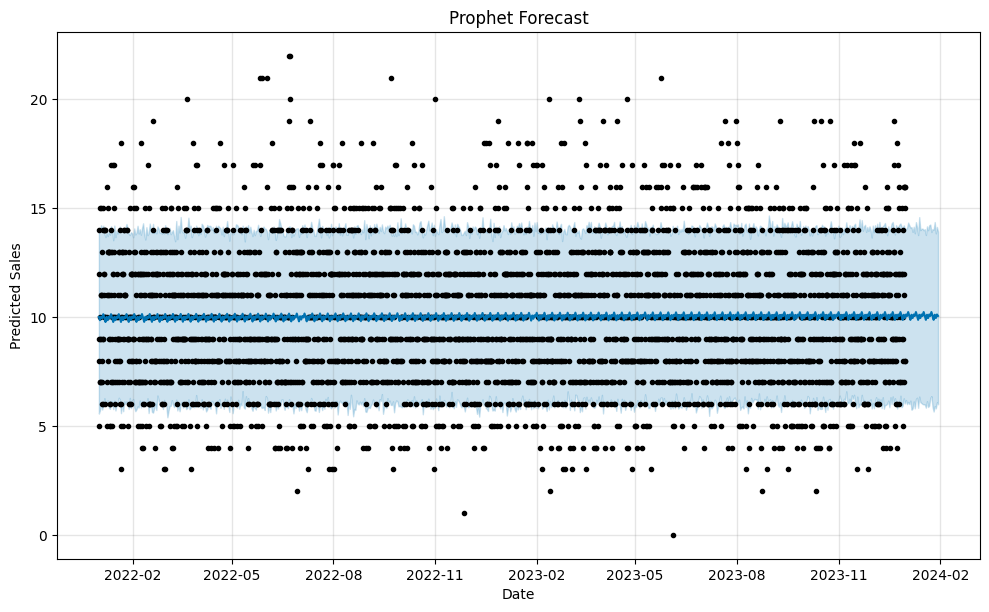

In [8]:
import matplotlib.pyplot as plt

fig = model.plot(forecast)
plt.title("Prophet Forecast")
plt.xlabel("Date")
plt.ylabel("Predicted Sales")
plt.savefig("forecast_plot.png")  # Save for MLflow
plt.show()


In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Merge for comparison
merged = pd.merge(df, forecast[['ds', 'yhat']], on='ds')
rmse = np.sqrt(mean_squared_error(merged['y'], merged['yhat']))
mae = mean_absolute_error(merged['y'], merged['yhat'])

print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}")


RMSE: 3.14, MAE: 2.49


In [13]:
import os

os.environ["MLFLOW_TRACKING_USERNAME"] = "suman2k4"
os.environ["MLFLOW_TRACKING_PASSWORD"] = "442fcc0e31d1b42763dffd65c214f8eecd5605c5"  # 🔁 Paste your DAGsHub token


In [14]:
import mlflow

mlflow.set_tracking_uri("https://dagshub.com/suman2k4/supply-chain-demand-forecasting.mlflow")
mlflow.set_experiment("forecasting-experiments")

with mlflow.start_run():
    mlflow.log_param("model_type", "Prophet")
    mlflow.log_param("forecast_days", 30)
    
    mlflow.log_metric("rmse", rmse)
    mlflow.log_metric("mae", mae)
    
    mlflow.log_artifact("forecast_plot.png")

    print("✅ Prophet model run logged to MLflow!")


✅ Prophet model run logged to MLflow!
🏃 View run hilarious-hog-896 at: https://dagshub.com/suman2k4/supply-chain-demand-forecasting.mlflow/#/experiments/0/runs/932e20b9a814485abc362cf52327862d
🧪 View experiment at: https://dagshub.com/suman2k4/supply-chain-demand-forecasting.mlflow/#/experiments/0
